In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

<h1>Authentication: </h1>

In [1]:
IBMToken = "your_token"

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel = "ibm_quantum", token = IBMToken, set_as_default = True, overwrite = True)
service = QiskitRuntimeService()

<h1>Testing the environment</h1>

In [4]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
 # Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()

backend = service.backend("ibmq_qasm_simulator")
job = Sampler(backend).run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cmeo7ighu2povi5p9p90
SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


<h1>Hello World</h1>
Creating a Bell State or two qubits entangled
<h3>Creating the circuit</h3>
To create a Bell State we need a pair of qubits. The first one need to be in superposition, so we apply the Hadamart gate on it. Then, the Controlled-X will control the second qubit with the result of the first superposition collapse, resulting in the Bell State.

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


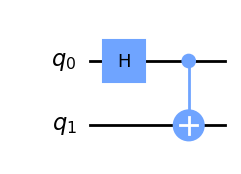

In [5]:
#creating a circuit with 2 qubits and 2 classical bit
bellStateCircuit = QuantumCircuit(2)
#adding Hadamart to qubit 0
bellStateCircuit.h(0)
#performing CX on qubit 1 controlled by qubit 0
bellStateCircuit.cx(0, 1)
#drawing the circuit
bellStateCircuit.draw("mpl")

<h3>Executing the circuit</h3>
Quantum computers produce some random results, so we run the circuit multiple times to analyze the final result.
In this example we use the Estimator to check the correlation of the two qubits with Pauli gates.

In [6]:
from qiskit.quantum_info import Pauli
#create the Pauli Operators to check correlations between the qubits
pauliObservables = [Pauli('IZ'), Pauli('IX'), Pauli('ZI'), Pauli('XI'), Pauli('ZZ'), Pauli('XX')]

In [7]:
from qiskit_ibm_runtime import Estimator, Options

backend = service.least_busy(simulator = False, operational = True)

#setting error mitigation options
options = Options()
# apply minimal mitigation cost on readout
options.resilience_level = 1
# apply probabilistic error cancelation method
options.optimization_level = 3

#creating the Estimator
estimator = Estimator(backend, options = options)

#run the circuit
job = estimator.run(circuits = [bellStateCircuit] * len(pauliObservables) , observables = pauliObservables, shots = 5000)

#check the results
job.result()

EstimatorResult(values=array([-0.02046327, -0.02216854, -0.0282455 , -0.02497066,  0.97788987,
        0.9765802 ]), metadata=[{'variance': 1.139138895589845, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.139066196723299, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.04987849377627, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.0500527681886485, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.23868903458215404, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, '

<h3> Analyzing the results</h3>
Now we plot the results to check for the correlations

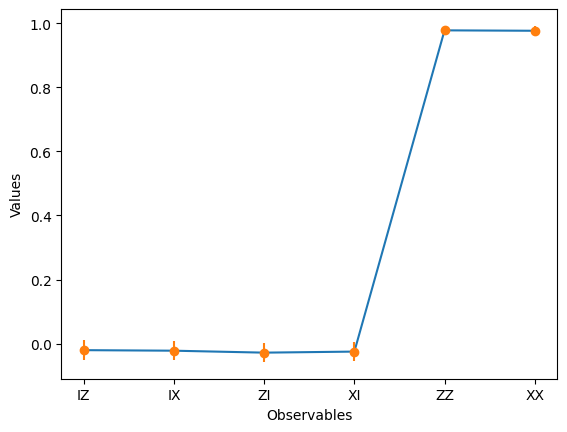

In [8]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()